In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gan-getting-started/monet_jpg/f4413e97bd.jpg
/kaggle/input/gan-getting-started/monet_jpg/7341d96c1d.jpg
/kaggle/input/gan-getting-started/monet_jpg/de6f71b00f.jpg
/kaggle/input/gan-getting-started/monet_jpg/99d94af5dd.jpg
/kaggle/input/gan-getting-started/monet_jpg/99a51d3e25.jpg
/kaggle/input/gan-getting-started/monet_jpg/d05cab011d.jpg
/kaggle/input/gan-getting-started/monet_jpg/4e05523825.jpg
/kaggle/input/gan-getting-started/monet_jpg/c68c52e8fc.jpg
/kaggle/input/gan-getting-started/monet_jpg/40d7d18ad3.jpg
/kaggle/input/gan-getting-started/monet_jpg/f96a8de9f3.jpg
/kaggle/input/gan-getting-started/monet_jpg/79224da51f.jpg
/kaggle/input/gan-getting-started/monet_jpg/23832dead5.jpg
/kaggle/input/gan-getting-started/monet_jpg/85580214be.jpg
/kaggle/input/gan-getting-started/monet_jpg/47a0548067.jpg
/kaggle/input/gan-getting-started/monet_jpg/fb93438ff9.jpg
/kaggle/input/gan-getting-started/monet_jpg/89d970411d.jpg
/kaggle/input/gan-getting-started/monet_jpg/7960adbd50.j

In [2]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt

# Set up directories
MONET_JPG_DIR = '/kaggle/input/gan-getting-started/monet_jpg'
MONET_TFREC_DIR = '/kaggle/input/gan-getting-started/monet_tfrec'
PHOTO_JPG_DIR = '/kaggle/input/gan-getting-started/photo_jpg'
PHOTO_TFREC_DIR = '/kaggle/input/gan-getting-started/photo_tfrec'

# Set image size and batch size
IMG_HEIGHT = 256
IMG_WIDTH = 256
BATCH_SIZE = 16
BUFFER_SIZE = 1000

In [3]:
def decode_image(image):
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [IMG_HEIGHT, IMG_WIDTH])
    image = (image / 127.5) - 1  # Normalize to [-1, 1]
    return image

def read_tfrecord(example):
    TFREC_FORMAT = {
        "image": tf.io.FixedLenFeature([], tf.string),  # tf.string means bytes
    }
    example = tf.io.parse_single_example(example, TFREC_FORMAT)
    image = decode_image(example['image'])
    return image

def load_tfrecord_dataset(filenames):
    dataset = tf.data.TFRecordDataset(filenames)
    dataset = dataset.map(read_tfrecord, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    return dataset

# Load TFRecords for Monet and Photo images
monet_files = tf.io.gfile.glob(f"{MONET_TFREC_DIR}/*.tfrec")
photo_files = tf.io.gfile.glob(f"{PHOTO_TFREC_DIR}/*.tfrec")

monet_ds = load_tfrecord_dataset(monet_files)
photo_ds = load_tfrecord_dataset(photo_files)

# Prepare datasets for training
monet_ds = monet_ds.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)
photo_ds = photo_ds.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)


In [4]:
print('Number of images in Monet directory: ', len(os.listdir(MONET_JPG_DIR)))
print('Number of images in Photo directory: ', len(os.listdir(PHOTO_JPG_DIR)))

Number of images in Monet directory:  300
Number of images in Photo directory:  7038


In [5]:
def decode_image(image):
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [IMG_HEIGHT, IMG_WIDTH])
    image = (image / 127.5) - 1  # Normalize to [-1, 1]
    return image

def read_tfrecord(example):
    TFREC_FORMAT = {
        "image": tf.io.FixedLenFeature([], tf.string),  # tf.string means bytes
    }
    example = tf.io.parse_single_example(example, TFREC_FORMAT)
    image = decode_image(example['image'])
    return image

def load_tfrecord_dataset(filenames):
    dataset = tf.data.TFRecordDataset(filenames)
    dataset = dataset.map(read_tfrecord, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    return dataset

# Load TFRecords for Monet and Photo images
monet_files = tf.io.gfile.glob(f"{MONET_TFREC_DIR}/*.tfrec")
photo_files = tf.io.gfile.glob(f"{PHOTO_TFREC_DIR}/*.tfrec")

monet_ds = load_tfrecord_dataset(monet_files)
photo_ds = load_tfrecord_dataset(photo_files)

# Prepare datasets for training
monet_ds = monet_ds.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)
photo_ds = photo_ds.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)

In [6]:
def count_samples(dataset):
    count = 0
    for _ in dataset:
        count += 1
    return count

monet_count = count_samples(monet_ds)
photo_count = count_samples(photo_ds)

print(f"Number of Monet images: {monet_count}")
print(f"Number of Photo images: {photo_count}")


Number of Monet images: 19
Number of Photo images: 440


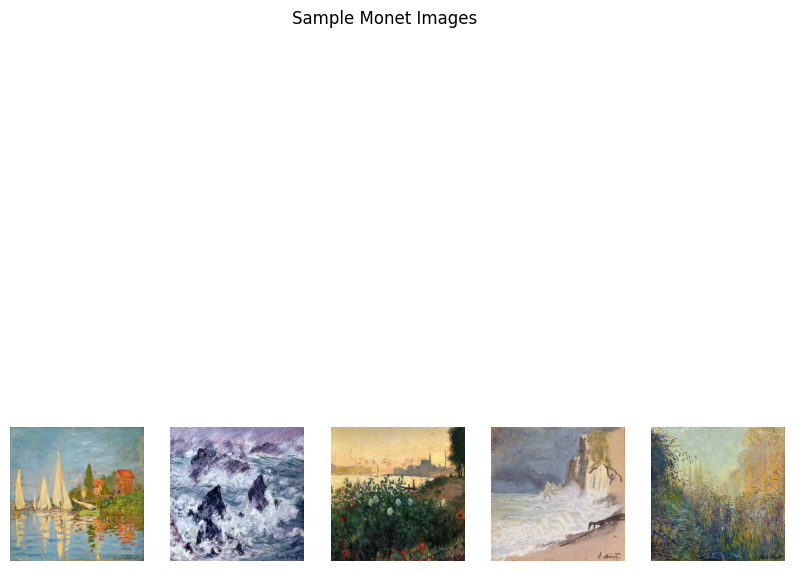

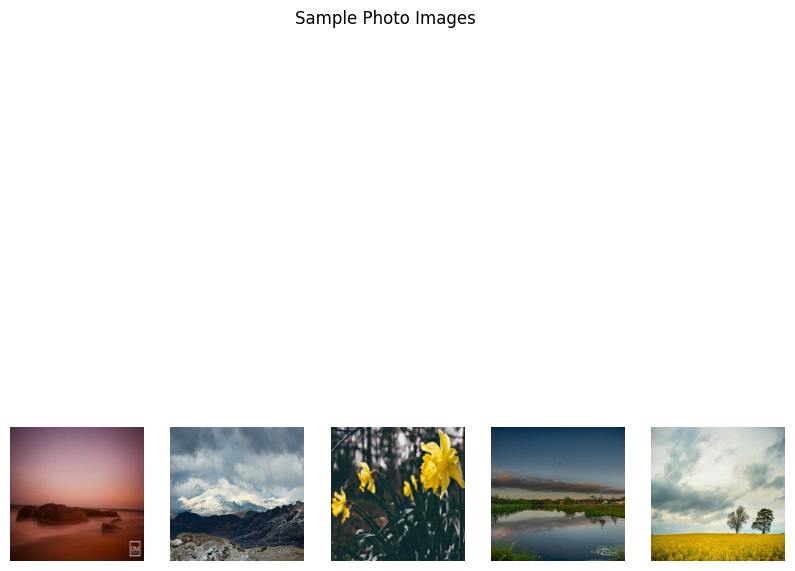

In [7]:
def show_sample_images(dataset, title, num_samples=5):
    plt.figure(figsize=(10, 10))
    for i, image in enumerate(dataset.take(num_samples)):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow((image[0] + 1) / 2)  # Convert back from [-1, 1] to [0, 1]
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Show 5 samples of Monet images
show_sample_images(monet_ds, "Sample Monet Images")

# Show 5 samples of Photo images
show_sample_images(photo_ds, "Sample Photo Images")


In [8]:
def check_data_integrity(dataset, name):
    error_count = 0
    for i, data in enumerate(dataset):
        try:
            img = data
        except Exception as e:
            print(f"Error in {name} dataset at index {i}: {e}")
            error_count += 1
    if error_count == 0:
        print(f"No errors found in {name} dataset.")
    else:
        print(f"Found {error_count} errors in {name} dataset.")

check_data_integrity(monet_ds, "Monet")
check_data_integrity(photo_ds, "Photo")


No errors found in Monet dataset.
No errors found in Photo dataset.


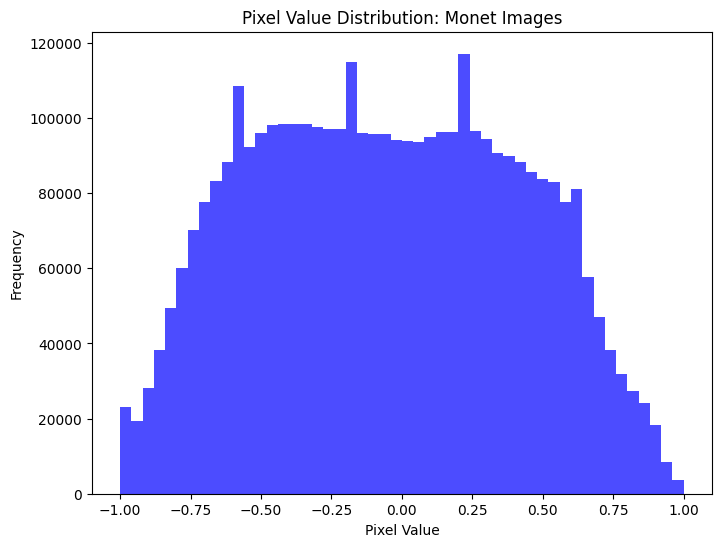

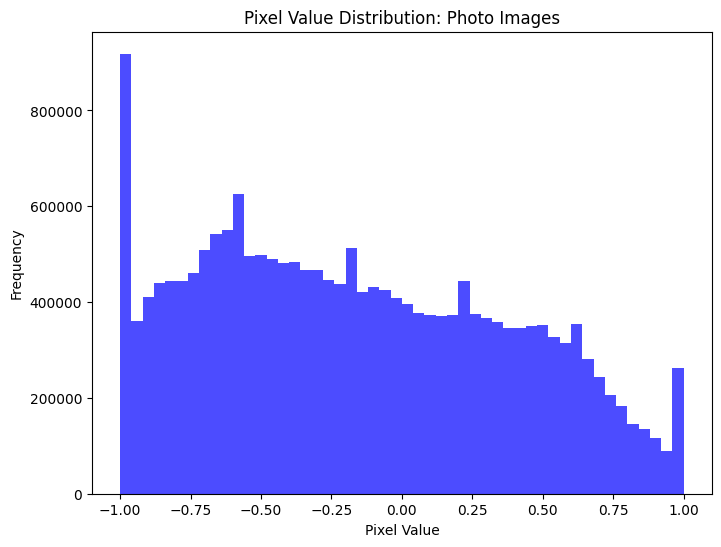

In [9]:
def plot_pixel_distribution(dataset, title, num_samples=100):
    pixels = []
    for image_batch in dataset.take(num_samples):
        image = image_batch[0]  # Get one image from the batch
        pixels.append(image.numpy().flatten())

    pixels = np.concatenate(pixels)
    plt.figure(figsize=(8, 6))
    plt.hist(pixels, bins=50, color='blue', alpha=0.7)
    plt.title(f'Pixel Value Distribution: {title}')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.show()

# Plot pixel distribution for Monet images
plot_pixel_distribution(monet_ds, "Monet Images")

# Plot pixel distribution for Photo images
plot_pixel_distribution(photo_ds, "Photo Images")


In [10]:
import numpy as np
import pandas as pd
import os
import math
import matplotlib.pyplot as plt
import cv2
import random

from plotly.subplots import make_subplots
import plotly.graph_objs as go

from skimage import data

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization, Input
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

In [11]:
MONET_JPG_PATH = '/kaggle/input/gan-getting-started/monet_jpg'
MONET_TFREC_DIR = '/kaggle/input/gan-getting-started/monet_tfrec'
PHOTO_JPG_PATH = '/kaggle/input/gan-getting-started/photo_jpg'
PHOTO_TFREC_DIR = '/kaggle/input/gan-getting-started/photo_tfrec'

In [12]:
shapes_set = set()
image_names = os.listdir(MONET_JPG_PATH)
for img_name in image_names:
    img = cv2.imread(os.path.join(MONET_JPG_PATH, img_name))
    shapes_set.add(img.shape)

print('Number of unique image shapes inside Monet directory: ', len(shapes_set))
print('Image shape sizes: ', shapes_set.pop())

shapes_set = set()
image_names = os.listdir(PHOTO_JPG_PATH)
for img_name in image_names:
    img = cv2.imread(os.path.join(PHOTO_JPG_PATH, img_name))
    shapes_set.add(img.shape)
    
print('Number of unique image shapes inside Photo directory: ', len(shapes_set))
print('Image shape sizes: ', shapes_set.pop())

Number of unique image shapes inside Monet directory:  1
Image shape sizes:  (256, 256, 3)
Number of unique image shapes inside Photo directory:  1
Image shape sizes:  (256, 256, 3)


In [13]:
def visualize_images(path, n_images, is_random=True, figsize=(16, 16)):
    plt.figure(figsize=figsize)
    w = int(n_images ** .5)
    h = math.ceil(n_images / w)
    
    all_names = os.listdir(path)
    image_names = all_names[:n_images]   
    if is_random:
        image_names = random.sample(all_names, n_images)
            
    for ind, image_name in enumerate(image_names):
        img = cv2.imread(os.path.join(path, image_name))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
        plt.subplot(h, w, ind + 1)
        plt.imshow(img)
        plt.xticks([])
        plt.yticks([])
    
    plt.show()

In [14]:
def show_color_histogram(path):
    image_names = os.listdir(path)
    image_name = random.choice(image_names)
    img = cv2.imread(os.path.join(path, image_name))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    fig = make_subplots(1, 2)

    fig.add_trace(go.Image(z=img), 1, 1)
    for channel, color in enumerate(['red', 'green', 'blue']):
        fig.add_trace(
            go.Histogram(
                x=img[..., channel].ravel(), 
                opacity=0.5,
                marker_color=color, 
                name='%s channel' %color), 
            1, 
            2
        )
    fig.update_layout(height=400)
    fig.show()

In [15]:
show_color_histogram(MONET_JPG_PATH)

In [16]:
show_color_histogram(PHOTO_JPG_PATH)

In [17]:
from tensorflow.keras import layers

def build_generator():
    inputs = layers.Input(shape=[IMG_HEIGHT, IMG_WIDTH, 3])
    down_stack = [
        layers.Conv2D(64, 4, strides=2, padding='same', activation='relu'),
        layers.Conv2D(128, 4, strides=2, padding='same', activation='relu'),
        layers.Conv2D(256, 4, strides=2, padding='same', activation='relu'),
    ]

    up_stack = [
        layers.Conv2DTranspose(128, 4, strides=2, padding='same', activation='relu'),
        layers.Conv2DTranspose(64, 4, strides=2, padding='same', activation='relu'),
        layers.Conv2DTranspose(3, 4, strides=2, padding='same', activation='tanh'),
    ]

    x = inputs
    for down in down_stack:
        x = down(x)
    for up in up_stack:
        x = up(x)
    return tf.keras.Model(inputs=inputs, outputs=x)

def build_discriminator():
    inputs = layers.Input(shape=[IMG_HEIGHT, IMG_WIDTH, 3])
    down_stack = [
        layers.Conv2D(64, 4, strides=2, padding='same', activation='relu'),
        layers.Conv2D(128, 4, strides=2, padding='same', activation='relu'),
        layers.Conv2D(256, 4, strides=2, padding='same', activation='relu'),
    ]

    x = inputs
    for down in down_stack:
        x = down(x)
    outputs = layers.Conv2D(1, 4, strides=1)(x)
    return tf.keras.Model(inputs=inputs, outputs=outputs)


In [18]:
# # Prepare datasets for training
# monet_ds = monet_ds.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True).prefetch(tf.data.experimental.AUTOTUNE)
# photo_ds = photo_ds.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True).prefetch(tf.data.experimental.AUTOTUNE)

# # Zip the two datasets together for training (before distributing)
# combined_dataset = tf.data.Dataset.zip((monet_ds, photo_ds))

# # Distribute the combined dataset
# distributed_dataset = strategy.experimental_distribute_dataset(combined_dataset)

# # Calculate the number of batches (optional)
# num_batches = len(list(combined_dataset))

# # Training loop
# for epoch in range(EPOCHS):
#     print(f'Epoch {epoch+1}/{EPOCHS}')

#     # Reset metrics at the start of each epoch
#     train_loss_g.reset_state()
#     train_loss_f.reset_state()
#     train_loss_disc_x.reset_state()
#     train_loss_disc_y.reset_state()

#     progress_bar = tqdm(distributed_dataset, total=num_batches, desc=f"Epoch {epoch+1}")

#     for batch in progress_bar:
#         real_x, real_y = batch

#         # Run the distributed train step using the correct method
#         losses = strategy.run(train_step, args=(real_x, real_y))

#         # Update metrics
#         train_loss_g.update_state(losses['gen_g_loss'])
#         train_loss_f.update_state(losses['gen_f_loss'])
#         train_loss_disc_x.update_state(losses['disc_x_loss'])
#         train_loss_disc_y.update_state(losses['disc_y_loss'])

#         # Update progress bar
#         progress_bar.set_postfix({
#             'gen_g_loss': train_loss_g.result().numpy(),
#             'gen_f_loss': train_loss_f.result().numpy(),
#             'disc_x_loss': train_loss_disc_x.result().numpy(),
#             'disc_y_loss': train_loss_disc_y.result().numpy(),
#         })

#     print(f'Epoch {epoch+1} completed.')
#     print(f"Generator G Loss: {train_loss_g.result().numpy():.4f}, "
#           f"Generator F Loss: {train_loss_f.result().numpy():.4f}, "
#           f"Discriminator X Loss: {train_loss_disc_x.result().numpy():.4f}, "
#           f"Discriminator Y Loss: {train_loss_disc_y.result().numpy():.4f}")


In [19]:
# # Save the models after training
# generator_g.save('generator_g_photo_to_monet.h5')  # Generator that converts photos to Monet-style
# generator_f.save('generator_f_monet_to_photo.h5')  # Generator that converts Monet-style to photo


In [20]:
import tensorflow as tf

# Set directories
MONET_TFREC_DIR = '/kaggle/input/gan-getting-started/monet_tfrec'
PHOTO_TFREC_DIR = '/kaggle/input/gan-getting-started/photo_tfrec'

IMG_HEIGHT = 256
IMG_WIDTH = 256

# Decode and preprocess images
def decode_image(image):
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [IMG_HEIGHT, IMG_WIDTH])
    image = (image / 127.5) - 1  # Normalize to [-1, 1]
    return image

def read_tfrecord(example):
    TFREC_FORMAT = {
        "image": tf.io.FixedLenFeature([], tf.string),
    }
    example = tf.io.parse_single_example(example, TFREC_FORMAT)
    image = decode_image(example['image'])
    return image

def load_tfrecord_dataset(filenames):
    dataset = tf.data.TFRecordDataset(filenames)
    dataset = dataset.map(read_tfrecord, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    return dataset

monet_files = tf.io.gfile.glob(f"{MONET_TFREC_DIR}/*.tfrec")
photo_files = tf.io.gfile.glob(f"{PHOTO_TFREC_DIR}/*.tfrec")

monet_ds = load_tfrecord_dataset(monet_files).batch(16).prefetch(tf.data.experimental.AUTOTUNE)
photo_ds = load_tfrecord_dataset(photo_files).batch(16).prefetch(tf.data.experimental.AUTOTUNE)


In [21]:
from tensorflow.keras import layers

def build_generator():
    inputs = layers.Input(shape=[IMG_HEIGHT, IMG_WIDTH, 3])

    down_stack = [
        layers.Conv2D(64, 4, strides=2, padding='same', activation='relu'),
        layers.Conv2D(128, 4, strides=2, padding='same', activation='relu'),
        layers.Conv2D(256, 4, strides=2, padding='same', activation='relu'),
    ]

    up_stack = [
        layers.Conv2DTranspose(128, 4, strides=2, padding='same', activation='relu'),
        layers.Conv2DTranspose(64, 4, strides=2, padding='same', activation='relu'),
        layers.Conv2DTranspose(3, 4, strides=2, padding='same', activation='tanh'),
    ]

    x = inputs
    for down in down_stack:
        x = down(x)
    for up in up_stack:
        x = up(x)

    return tf.keras.Model(inputs=inputs, outputs=x)

def build_discriminator():
    inputs = layers.Input(shape=[IMG_HEIGHT, IMG_WIDTH, 3])
    
    down_stack = [
        layers.Conv2D(64, 4, strides=2, padding='same', activation='relu'),
        layers.Conv2D(128, 4, strides=2, padding='same', activation='relu'),
        layers.Conv2D(256, 4, strides=2, padding='same', activation='relu'),
    ]

    x = inputs
    for down in down_stack:
        x = down(x)

    outputs = layers.Conv2D(1, 4, strides=1)(x)

    return tf.keras.Model(inputs=inputs, outputs=outputs)


In [22]:
loss_obj = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def generator_loss(generated):
    return loss_obj(tf.ones_like(generated), generated)

def discriminator_loss(real, generated):
    real_loss = loss_obj(tf.ones_like(real), real)
    generated_loss = loss_obj(tf.zeros_like(generated), generated)
    return real_loss + generated_loss

generator_g_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
discriminator_x_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)


In [23]:
# Define the strategy (e.g., MirroredStrategy for multi-GPU training)
strategy = tf.distribute.MirroredStrategy()

print(f"Number of devices: {strategy.num_replicas_in_sync}")

with strategy.scope():
    # Define and build the generator and discriminator models inside strategy scope
    generator_g = build_generator()  # Generator for photos -> Monet
    discriminator_x = build_discriminator()  # Discriminator for Monet images

    # Define the optimizers within the strategy scope
    generator_g_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
    discriminator_x_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

# Define the training step using the distribution strategy
@tf.function
def distributed_train_step(real_photo, real_monet):
    def train_step(real_photo, real_monet):
        with tf.GradientTape(persistent=True) as tape:
            # Generate Monet-style image from photo
            generated_monet = generator_g(real_photo, training=True)

            # Discriminator output for real Monet image and generated Monet image
            real_output = discriminator_x(real_monet, training=True)
            generated_output = discriminator_x(generated_monet, training=True)

            # Compute generator and discriminator losses
            gen_loss = generator_loss(generated_output)
            disc_loss = discriminator_loss(real_output, generated_output)

        # Compute gradients
        generator_gradients = tape.gradient(gen_loss, generator_g.trainable_variables)
        discriminator_gradients = tape.gradient(disc_loss, discriminator_x.trainable_variables)

        # Apply gradients
        generator_g_optimizer.apply_gradients(zip(generator_gradients, generator_g.trainable_variables))
        discriminator_x_optimizer.apply_gradients(zip(discriminator_gradients, discriminator_x.trainable_variables))

        return gen_loss, disc_loss

    # Distribute the train step across the replicas
    per_replica_gen_loss, per_replica_disc_loss = strategy.run(train_step, args=(real_photo, real_monet))

    # Reduce the loss across all replicas
    gen_loss = strategy.reduce(tf.distribute.ReduceOp.SUM, per_replica_gen_loss, axis=None)
    disc_loss = strategy.reduce(tf.distribute.ReduceOp.SUM, per_replica_disc_loss, axis=None)

    return gen_loss, disc_loss

# Training loop
EPOCHS = 50
for epoch in range(EPOCHS):
    print(f'Epoch {epoch+1}/{EPOCHS}')

    # Loop through the dataset
    for real_photo, real_monet in tf.data.Dataset.zip((photo_ds, monet_ds)):
        gen_loss, disc_loss = distributed_train_step(real_photo, real_monet)

    print(f"Epoch {epoch+1} completed. Generator Loss: {gen_loss:.4f}, Discriminator Loss: {disc_loss:.4f}")


Number of devices: 2
Epoch 1/50
Epoch 1 completed. Generator Loss: 3.6025, Discriminator Loss: 0.4226
Epoch 2/50
Epoch 2 completed. Generator Loss: 2.5920, Discriminator Loss: 0.8747
Epoch 3/50
Epoch 3 completed. Generator Loss: 5.2252, Discriminator Loss: 1.9509
Epoch 4/50
Epoch 4 completed. Generator Loss: 2.0819, Discriminator Loss: 1.4752
Epoch 5/50
Epoch 5 completed. Generator Loss: 1.7477, Discriminator Loss: 1.9337
Epoch 6/50
Epoch 6 completed. Generator Loss: 2.1696, Discriminator Loss: 1.9460
Epoch 7/50
Epoch 7 completed. Generator Loss: 2.4827, Discriminator Loss: 1.8735
Epoch 8/50
Epoch 8 completed. Generator Loss: 3.4962, Discriminator Loss: 1.9733
Epoch 9/50
Epoch 9 completed. Generator Loss: 2.0287, Discriminator Loss: 1.5286
Epoch 10/50
Epoch 10 completed. Generator Loss: 2.0170, Discriminator Loss: 2.0709
Epoch 11/50
Epoch 11 completed. Generator Loss: 7.4876, Discriminator Loss: 3.9219
Epoch 12/50
Epoch 12 completed. Generator Loss: 1.8262, Discriminator Loss: 1.5719
E

In [24]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import save_img

output_dir = '../tmp/generated_images'
os.makedirs(output_dir, exist_ok=True)

# Iterate over the photo dataset and generate Monet-style images
for i, photo_batch in enumerate(photo_ds.take(7000)):  # Generate 7,000 images
    generated_monet_batch = generator_g(photo_batch, training=False)

    for j, generated_monet in enumerate(generated_monet_batch):
        # Convert the generated image back to [0, 255] range from [-1, 1]
        generated_image = (generated_monet * 127.5 + 127.5).numpy().astype(np.uint8)

        # Save the image
        img_path = os.path.join(output_dir, f"monet_{i * len(photo_batch) + j}.jpg")
        save_img(img_path, generated_image)

print(f"Generated Monet-style images are saved in: {output_dir}")


Generated Monet-style images are saved in: ../tmp/generated_images


In [25]:
import zipfile

zip_filename = 'images.zip'

# Create a zip file of all generated images
with zipfile.ZipFile(zip_filename, 'w') as zipf:
    for root, dirs, files in os.walk(output_dir):
        for file in files:
            zipf.write(os.path.join(root, file), file)

print(f"Images have been zipped into: {zip_filename}")


Images have been zipped into: images.zip
